In [51]:
import csv
import matplotlib.pyplot as plt
import numpy
import math
import matplotlib

matplotlib.rcParams.update({'font.size': 30})

%matplotlib inline  

def read_file(file_name):
    timing_mod_name = ""
    mod_timings = {}
    module_infos = []    
    to_millisecs = math.pow(10,-6)
    
    with open(file_name, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=':')
        for row in spamreader:
            if (len(row) > 1):
                # first column is name
                module_name = row[0]
                # all other are timing values
                timings = [ float(v) for v in row[1:]]
                if module_name in mod_timings:
                    mod_timings[module_name] += timings
                else:
                    mod_timings[module_name] = timings
    return mod_timings

file_name = "../../build/DescentGame/perf_mes.log"
timing_info = read_file(file_name)
print ("%i module timings loaded from file %s" % (len(timing_info), file_name ))

30 module timings loaded from file ../../build/DescentGame/perf_mes.log


In [52]:
summed = []
for (k,v) in timing_info.iteritems():
    i = 0
    for vv in v:
        while ( len(summed)-1 < i ):
            summed += [0.0]
        summed[i] += vv
        i += 1

timing_info["total"] = summed

print ("compiled %i time snapshots" % len(summed))

compiled 12024 time snapshots


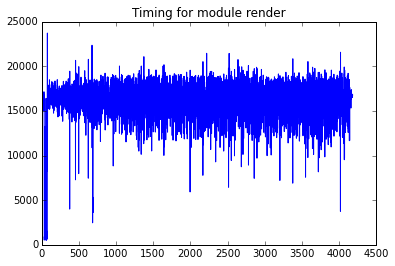

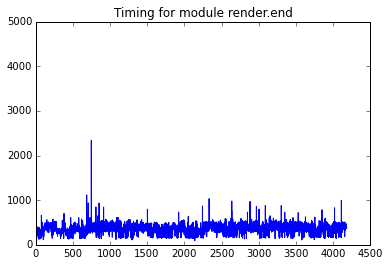

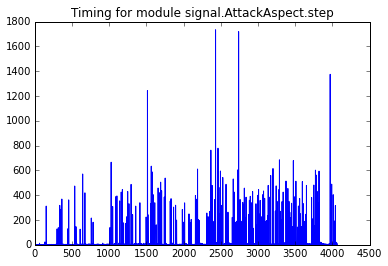

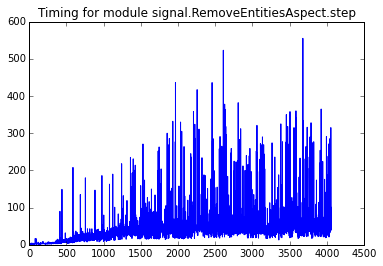

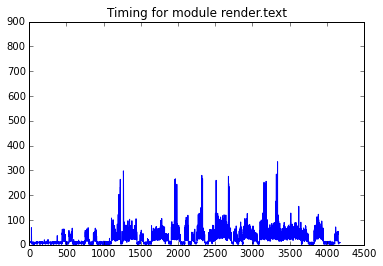

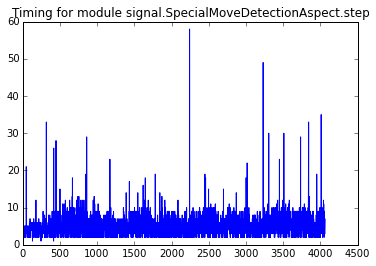

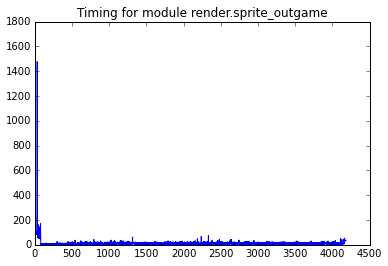

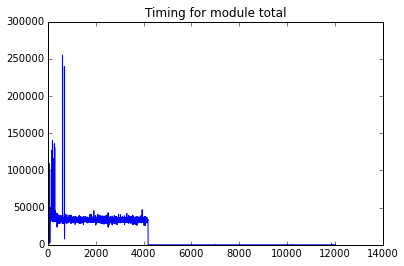

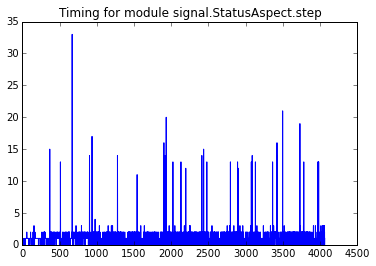

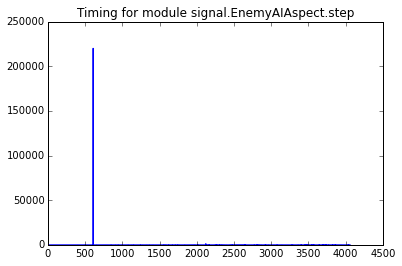

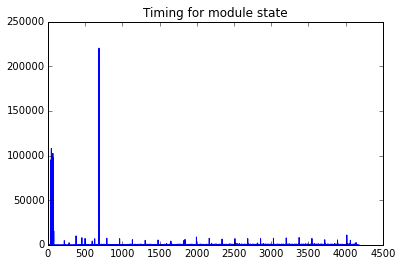

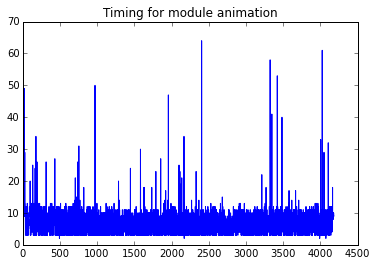

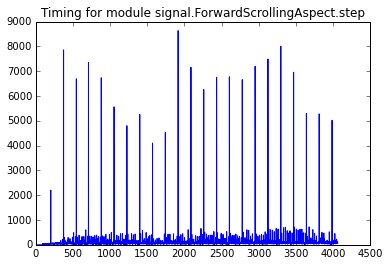

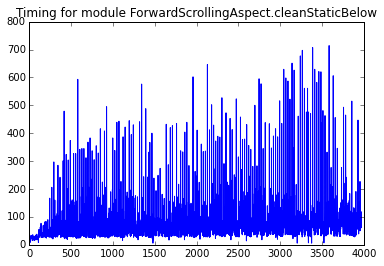

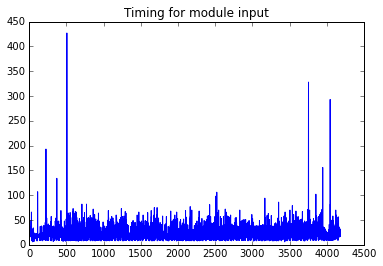

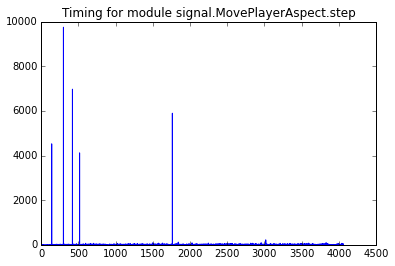

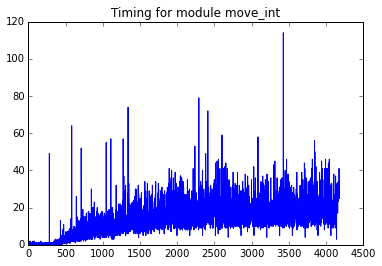

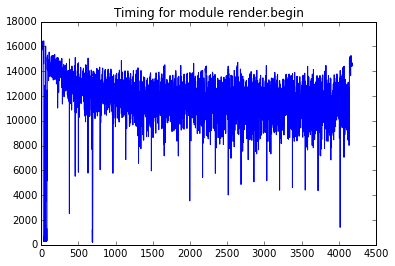

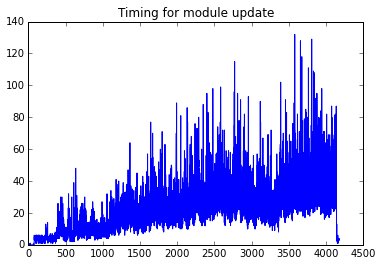

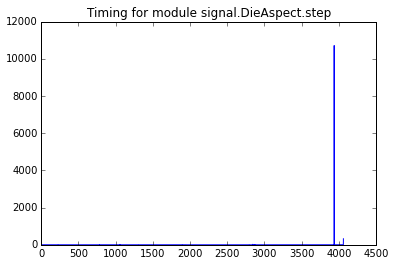

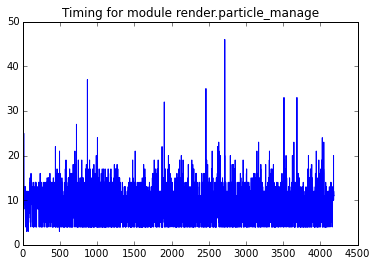

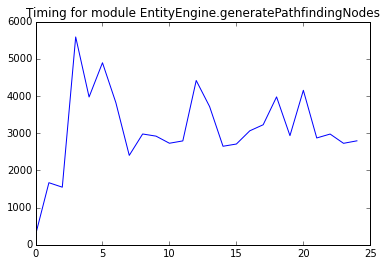

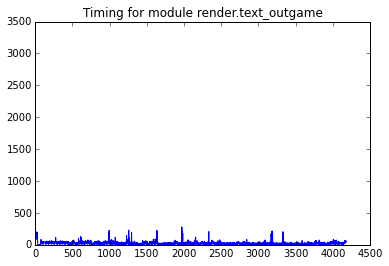

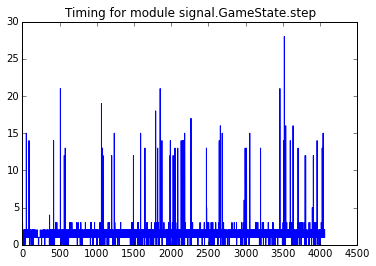

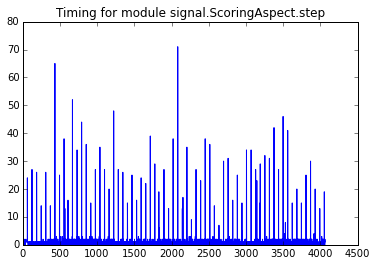

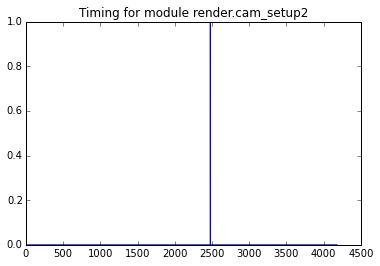

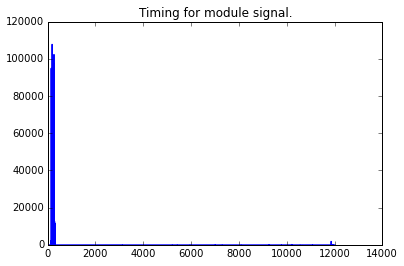

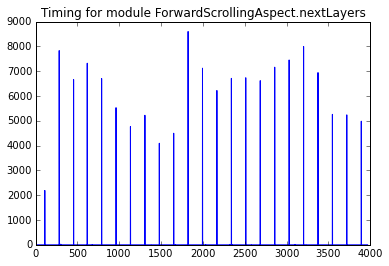

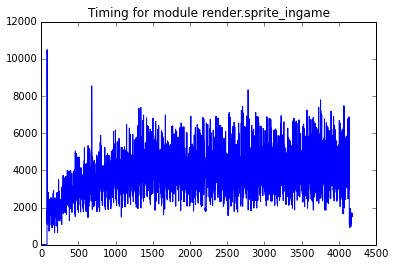

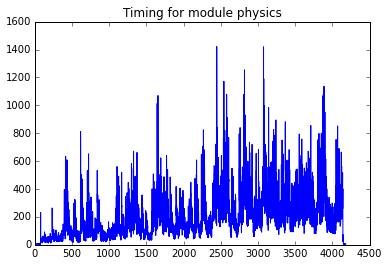

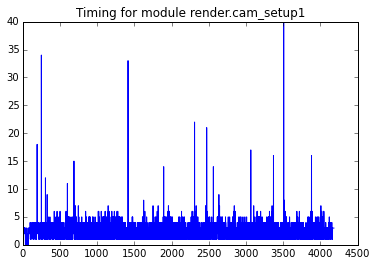

In [53]:
for (k,v) in timing_info.iteritems():
    step = range(len(v))
    
    fig = plt.figure()
    plt.plot( step, v)
    plt.title("Timing for module %s" % k)